<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [12]:
# input_shape = 13
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [13]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

x_train = Scaler.fit_transform(x_train)
x_test = Scaler.fit_transform(x_test)

In [58]:
from keras.models import Sequential
from keras.layers import Dense

boston_model = Sequential()
boston_model.add(Dense(13, input_shape=(13,), activation='relu'))
boston_model.add(Dense(13, activation='sigmoid'))
boston_model.add(Dense(13, activation = 'linear'))
boston_model.add(Dense(1, activation = 'linear'))

boston_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [59]:
boston_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_33 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_34 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 14        
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = boston_model.fit(x_train, y_train,
 batch_size=128, epochs=500, validation_data=(x_test, y_test), verbose=False)

In [61]:
scores = boston_model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 461us/step


In [62]:
print('Mean Squared Error:', scores[1])

Mean Squared Error: 34.9196662902832


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [454]:
# load the data

from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [455]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [456]:
batch_size = 128
num_classes = 10
epochs = 12

In [457]:
# one-hot encode the training and testing labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [458]:
# Transformed integer into a 10 element binary vector with a 1 for the index of the class value 
y_train[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [484]:
# X_train = X_train.reshape(60000, 28*28)
# X_test = X_test.reshape(10000, 28*28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Convert integers to floats
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [485]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [486]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, InputLayer, Activation

In [493]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [494]:
model.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_181 (Dense)            (None, 64)                65600     
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)              

In [495]:
history = model.fit(X_train, y_train,
 batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=False)

In [496]:
score = model.evaluate(X_test, y_test, verbose=0)

In [497]:
# Print test accuracy
print('Test accuracy:', score[1])

Test accuracy: 0.869


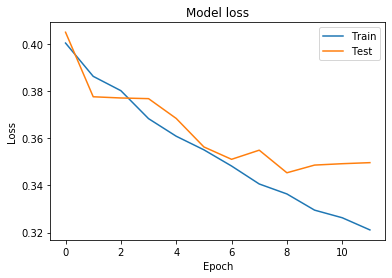

In [442]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [448]:
model.predict(X_test)

array([[5.33217133e-08, 1.42984831e-07, 7.26072402e-09, ...,
        1.23886056e-02, 1.44505032e-06, 9.82340574e-01],
       [1.41584605e-05, 2.76249579e-11, 9.95751977e-01, ...,
        1.44280041e-13, 9.18756982e-08, 4.10131998e-14],
       [3.64029895e-09, 1.00000000e+00, 9.47844025e-11, ...,
        5.30260447e-14, 2.45889290e-12, 1.09511820e-15],
       ...,
       [2.21300943e-04, 3.09687245e-08, 2.30699516e-06, ...,
        2.47524986e-06, 9.99577582e-01, 3.83351129e-08],
       [3.44219870e-07, 9.99954700e-01, 9.35314191e-08, ...,
        5.65837266e-10, 9.69054170e-09, 1.00681297e-09],
       [7.71463888e-08, 1.32559574e-09, 1.20989711e-07, ...,
        1.85437000e-03, 4.47121829e-06, 4.14195028e-06]], dtype=float32)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.